<a href="https://colab.research.google.com/github/taranaahad5-hue/programming/blob/main/Lab_1_Web_Scraping_and_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Tarana Ahad

## **Computing ID:** ewh8qj

In [ ]:
import pandas as pd
import numpy as np
import requests

import time, requests, pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt, math, time

# Lab 1: Web Scraping & APIs (100 pts)
## Due September 22nd at 11:59PM

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iwoJjEGsY2ej0s9i0iPXw50qpjNoDf_p?usp=sharing)


A great source of data and Pandas practice is getting data from the Internet. Rather than a .csv file, many data will be in a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

## Overview

You will collect data three ways and assemble it into Pandas DataFrames:

1. Scrape a Wikipedia page for two different HTML tags (20 pts total)

2. Scrape any non-Wikipedia HTML page for a (different) tag of interest (40 pts)

3. Use the PokeAPI to collect data using 5+ API queries (40 pts)

## Deliverable
For each section, put collected data into a Pandas DataFrame.

**Exception:** If a required tag’s content is only available inside an image (e.g., charts, logos),  plot the image URL(s) directly instead.

# **Part 1: Scrape a Wikipedia page for two different tags (20 pts)**


In Part 1, you will pick any single Wikipedia article and extract two distinct HTML tag types (ie: H1, H2, p, a, img). You will create a DataFrame per tag type and display the results.

## **Question 1 (5 points):** Pick a Wikipedia URL to web scrape data from. Decide which 2 HTML tags you would like to scrape (a comprehensive list is above).

Save the URL and tags as string and write them in the code cell below.

In [ ]:
url_str = "https://en.wikipedia.org/wiki/Quokka"
tag1 = "h1"
tag2 = "img"


## **Question 2 (5 points):** Write code to download your initial raw data using the `requests` package and store it in a variable.



In [ ]:
headers = {"User-Agent":"Mozilla/5.0 (student-lab)"}

In [ ]:
r = requests.get(url_str, headers=headers, timeout=30)

In [ ]:
r

<Response [200]>

In [ ]:
r.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Quokka - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur


## **Question 3 (10 points):** Extract your 2 chosen tags from your raw data and display the results. If the tag is text-based, create a DataFrame for the resulting tag contents. If the tag is image-based, plot 1 to 3 of your resulting images in the same figure.

If both tags are text based, you will create a separate DataFrame per tag.


In [ ]:
soup = BeautifulSoup(r.text, "lxml")

In [ ]:
h1_elements = soup.find_all("h1")

In [ ]:
h1_elements

[<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Quokka</span></h1>]

In [ ]:
h1_raw = [h.get_text() for h in h1_elements]
h1_raw

['Quokka']

In [ ]:
pd.DataFrame(h1_raw)

,0
0,Quokka


In [ ]:
h2_elements = soup.find_all("h2")
h2_raw = [h.get_text() for h in h2_elements]
pd.DataFrame(h2_raw)


,0
0,Contents
1,Description
2,Discovery and name
3,Ecology
4,Diet
5,Population
6,Conservation
7,Human interaction
8,Quokka selfies
9,See also


In [ ]:
a_elems = soup.find_all("a")
a_elems

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="/wiki/Help:Contents" title="Guidance on how to use and edit Wikipedia"><span>Help</span></a>,
 <a href="/wiki/Help:Introduction" title="Learn how to edit Wikipedia"><span>Learn to edit</span></a>,
 <a href="/wiki/Wikipedia:Community_portal" title="The

In [ ]:
my_links=[]
for a in a_elems:
  href = a.get("href")

  try:
    if "https" in href:
      print(href)
      my_links.append(href)
  except:
    pass

https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
https://ar.wikipedia.org/wiki/%D9%83%D9%88%D9%83%D8%A7_(%D8%AD%D9%8A%D9%88%D8%A7%D9%86)
https://gn.wikipedia.org/wiki/K%C3%BAoka
https://az.wikipedia.org/wiki/Kvokka
https://azb.wikipedia.org/wiki/%D8%B3%D8%AA%D9%88%D9%86%DB%8C%DA%A9%D8%B3_%D8%A8%D8%B1%D8%A7%DA%86%DB%8C%D9%88%D8%B1%D9%88%D8%B3
https://zh-min-nan.wikipedia.org/wiki/Quokka
https://be.wikipedia.org/wiki/%D0%9A%D0%B2%D0%BE%D0%BA%D0%B0
https://bg.wikipedia.org/wiki/%D0%9A%D1%83%D0%BE%D0%BA%D0%B0
https://br.wikipedia.org/wiki/Kwoka
https://ca.wikipedia.org/wiki/Quoca
https://ceb.wikipedia.org/wiki/Setonix_brachyurus
https://cs.wikipedia.org/wiki/Klokan_quokka
https://cy.wikipedia.org/wiki/Cwoca
https://da.wikipedia.org/wiki/Quokka
https://de.wikipedia.org/wiki/Quokka
https://nv.wikipedia.org/wiki/Nahat%CA%BCe%CA%

In [ ]:
pd.DataFrame(my_links, columns=["Links"])

,Links
0,https://donate.wikimedia.org/?wmf_source=donat...
1,https://donate.wikimedia.org/?wmf_source=donat...
2,https://ar.wikipedia.org/wiki/%D9%83%D9%88%D9%...
3,https://gn.wikipedia.org/wiki/K%C3%BAoka
4,https://az.wikipedia.org/wiki/Kvokka
...,...
178,https://developer.wikimedia.org
179,https://stats.wikimedia.org/#/en.wikipedia.org
180,https://foundation.wikimedia.org/wiki/Special:...
181,https://www.wikimedia.org/


In [ ]:
img_elems = soup.find_all("img")

In [ ]:
my_imgs = []
for img in img_elems:
  src = img.get("src")
  file_extension = src[-3:]

  if file_extension != "svg":
      print(src)

  if src[0:2] == "//":
      print(src[2:])
      my_imgs.append(src[2:])

/static/images/icons/wikipedia.png
//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png
upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/5/54/Quokka_at_rottnest_%28cropped%29.jpg/250px-Quokka_at_rottnest_%28cropped%29.jpg
upload.wikimedia.org/wikipedia/commons/thumb/5/54/Quokka_at_rottnest_%28cropped%29.jpg/250px-Quokka_at_rottnest_%28cropped%29.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Status_iucn3.1_VU.svg/250px-Status_iucn3.1_VU.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/6/63/Status_iucn3.1_VU.svg/250px-Status_iucn3.1_VU.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/8/8a/OOjs_UI_icon_edit-ltr.svg/20px-OOjs_UI_icon_edit-ltr.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/8/8a/OOjs_UI_icon_edit-ltr.svg/20px-OOjs_UI_icon_edit-ltr.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/

In [ ]:
my_imgs

['upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 'upload.wikimedia.org/wikipedia/commons/thumb/5/54/Quokka_at_rottnest_%28cropped%29.jpg/250px-Quokka_at_rottnest_%28cropped%29.jpg',
 'upload.wikimedia.org/wikipedia/commons/thumb/6/63/Status_iucn3.1_VU.svg/250px-Status_iucn3.1_VU.svg.png',
 'upload.wikimedia.org/wikipedia/commons/thumb/8/8a/OOjs_UI_icon_edit-ltr.svg/20px-OOjs_UI_icon_edit-ltr.svg.png',
 'upload.wikimedia.org/wikipedia/commons/thumb/2/22/Setonix_brachyurus_distribution.svg/250px-Setonix_brachyurus_distribution.svg.png',
 'upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Quokka_family.jpg/250px-Quokka_family.jpg',
 'upload.wikimedia.org/wikipedia/commons/thumb/9/98/Quokka_Selfie.jpg/250px-Quokka_Selfie.jpg',
 'upload.wikimedia.org/wikipedia/commons/thumb/e/e7/RottnestQuokka.jpg/250px-RottnestQuokka.jpg',
 'upload.wikimedia.org/wikipedia/en/thumb/4/4a/Commons-logo.svg/40px-Commons-logo.svg.png',
 'upload.wi

In [ ]:
urls = ["https://" + u for u in my_imgs]

In [ ]:
urls

['https://upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Quokka_at_rottnest_%28cropped%29.jpg/250px-Quokka_at_rottnest_%28cropped%29.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Status_iucn3.1_VU.svg/250px-Status_iucn3.1_VU.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/OOjs_UI_icon_edit-ltr.svg/20px-OOjs_UI_icon_edit-ltr.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Setonix_brachyurus_distribution.svg/250px-Setonix_brachyurus_distribution.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Quokka_family.jpg/250px-Quokka_family.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Quokka_Selfie.jpg/250px-Quokka_Selfie.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/RottnestQuokka.jpg/250px-RottnestQuokka.jpg',
 'https://upload.wikimedia.org/wikipedi

In [ ]:
from PIL import Image
from io import BytesIO

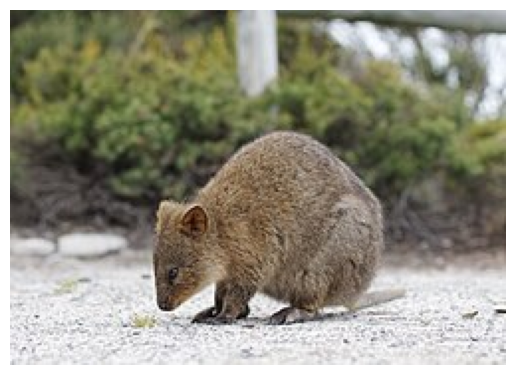

In [ ]:
image_url = urls[1]

r = requests.get(image_url, headers={"User-Agent":"Mozilla/5.0 (DS-3001)"}, timeout=20)
r.raise_for_status()

ct = r.headers.get("Content-Type","")
if "image/svg+xml" in ct or image_url.lower().endswith(".svg"):
    raise ValueError("This URL is an SVG; PIL can't open it directly.")

if "image" not in ct:
    raise ValueError(f"Not an image. Content-Type={ct}")

im = Image.open(BytesIO(r.content)).convert("RGBA")  # use content, not raw
plt.imshow(im); plt.axis("off"); plt.show()

# **Part 2: Scrape a Non-Wikipedia page (40 pts)**


**Web Scraping Examples**
* https://toscrape.com/
* https://www.scrapethissite.com/
* https://github.com/stanfordjournalism/search-script-scrape

In Part 2, you will choose any publicly accessible page (NOT Wikipedia) and build a DataFrame with at least 10 or more rows. The structure of the DataFrame and what tag(s) you extract will be your choice.

Examples of targets: a university course listing page, a simple product listing, a blog archive page, a conference schedule.


## **Question 1 (10 points):** Write code to connect to your chosen URL, download your initial raw data using the `requests` package, and store it in a variable. Decide which tag(s) you will scrape and store them in the list, mytags.



In [ ]:
url = "https://books.toscrape.com/"
mytags = ["p", "a", "img"]

In [ ]:
headers = {"User-Agent":"Mozilla/5.0 (student-lab)"}

In [ ]:
response = requests.get(url, headers = headers, timeout = 30)

In [ ]:
response.text

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" href


## **Question 2 (20 points):** Extract your chosen tag(s) from your raw data and display the results. Like before, create a DataFrame for text based tags. If the tag is image-based, plot 1 to 3 of your resulting images in the same figure.



In [ ]:
from urllib.parse import urljoin

In [ ]:
raw_data = response.text

In [ ]:
soup = BeautifulSoup(response.text, "lxml")

In [ ]:
titles = []
prices = []
availability = []
images = []


In [ ]:
for i in range(1, 51):
  page_url = f"https://books.toscrape.com/catalogue/page-{i}.html"
  response = requests.get(page_url, headers = headers, timeout = 30)
  raw_data = response.text
  soup = BeautifulSoup(raw_data, "lxml")

  a_elements = soup.find_all("a") if "a" in mytags else []
  p_elements = soup.find_all("p") if "p" in mytags else []
  img_elements = soup.find_all("img") if "img" in mytags else []


  for a in a_elements:
    try:
      titles.append(a["title"])
    except:
      pass


  for p in p_elements:
    try:
      if "price_color" in p.get("class", []):
        price_text = p.get_text(strip = True)
        price_num = float(price_text.replace("Â£", "").replace("£", ""))
        prices.append(price_num)
      elif "instock" in p.get("class", []):
        availability.append(p.get_text(strip = True))
    except:
      pass

  for img in img_elements:
    try:
      images.append(urljoin(page_url, img["src"]))
    except:
      pass


In [ ]:
images

['https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'https://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'https://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'https://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'https://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'https://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'https://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'https://books.toscrape.com/media/cache/10/48/1048f63

In [ ]:
img_elements

[<img alt="Frankenstein" class="thumbnail" src="../media/cache/00/25/0025515e987a1ebd648773f9ac70bfe6.jpg"/>,
 <img alt="Forever Rockers (The Rocker #12)" class="thumbnail" src="../media/cache/7f/b0/7fb03a053c270000667a50dd8d594843.jpg"/>,
 <img alt="Fighting Fate (Fighting #6)" class="thumbnail" src="../media/cache/57/e2/57e255929f6e597c18cb3843904cd92b.jpg"/>,
 <img alt="Emma" class="thumbnail" src="../media/cache/09/63/09638baaef52f03827c215029c632a13.jpg"/>,
 <img alt="Eat, Pray, Love" class="thumbnail" src="../media/cache/21/95/2195c296e82620593a143356aeaa7745.jpg"/>,
 <img alt="Deep Under (Walker Security #1)" class="thumbnail" src="../media/cache/74/e4/74e4ec43c40926c7b57fc0fe0f397183.jpg"/>,
 <img alt="Choosing Our Religion: The Spiritual Lives of America's Nones" class="thumbnail" src="../media/cache/df/ab/dfabeab158046237ddb6b713b794909f.jpg"/>,
 <img alt="Charlie and the Chocolate Factory (Charlie Bucket #1)" class="thumbnail" src="../media/cache/d6/cc/d6cc0c66e34dfc214b4062

In [ ]:
images

['https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'https://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'https://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'https://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'https://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'https://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'https://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'https://books.toscrape.com/media/cache/10/48/1048f63

In [ ]:
from PIL import Image
from io import BytesIO

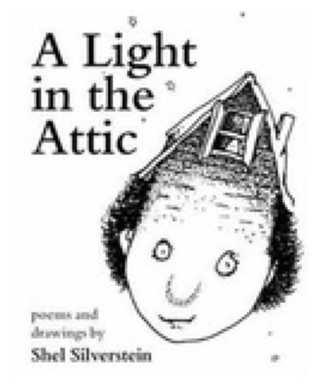

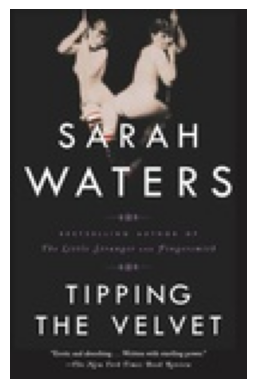

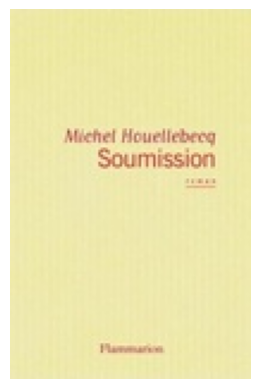

In [ ]:
for image_url in images[:3]:
  r = requests.get(image_url, headers={"User-Agent":"Mozilla/5.0 (DS-3001)"}, timeout=20)
  r.raise_for_status()

  ct = r.headers.get("Content-Type","")
  if "image/svg+xml" in ct or image_url.lower().endswith(".svg"):
    raise ValueError("This URL is an SVG; PIL can't open it directly.")
  if "image" not in ct:
    raise ValueError(f"Not an image. Content-Type={ct}")


  im = Image.open(BytesIO(r.content)).convert("RGBA")  # use content, not raw
  plt.imshow(im); plt.axis("off"); plt.show()

In [ ]:

title_df = pd.DataFrame({"Title":titles})
prices_df = pd.DataFrame({"Price":prices})
availability_df = pd.DataFrame({"Availability":availability})
books_df = []

books_df = pd.concat([pd.DataFrame({"Title":titles}), pd.DataFrame({"Price":prices}), pd.DataFrame({"Availability":availability})
],
 axis = 1
)
books_df


,Title,Price,Availability
0,A Light in the Attic,51.77,In stock
1,Tipping the Velvet,53.74,In stock
2,Soumission,50.10,In stock
3,Sharp Objects,47.82,In stock
4,Sapiens: A Brief History of Humankind,54.23,In stock
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock
998,1st to Die (Women's Murder Club #1),53.98,In stock



## **Question 3 (10 points):** Mine one or more of your resulting DataFrames to answer a question. Questions may be quantitative or qualitative. Here are a few examples to get you started, based on the books storefront example link.


*Quantitative*
*   What is the average book price?
*   What is the range (minimum and maximum) of book prices?
*   What is the most and least expensive book?
*   How many books are 5 star rated?

*Qualitative*
*   What are the 5 star books?
*   What are the images of 5 star books? How do they compare to the 1 star books?
*  What factors contribute to if a book is priced high or low?
* etc...

## Discuss in 2 or more sentences your interpretation of the answer(s) to your question(s).


In [ ]:
my_question = "What is the average book price?"

In [ ]:
avg_price = books_df["Price"].mean()
avg_price

np.float64(35.07035)

**The results to my question were....**

£35.07

This means that the mean price at the fictional bookstore is £35.07. Meaning that it is a pretty moderately priced bookstore, and not too cheap or expensive.

# **Part 3: Using an API for Data Sourcing (40 pts)**

In Part 3, you will query at least 5 Pokémon from the PokeAPI and build a DataFrame containing 5 or more columns that are interesting and comparable across Pokémon. Sample characteristics are below. If desired, another equivalent API of your choice can replace PokeAPI so long as the resulting DataFrame includes 5 or more columns.

**Example Characteristics:**
*   name
*   id
* base_experience
* height
* weight
* types (comma-joined)
* abilities (count)
* Statistics like HP/Attack
* Sprite URL (!!!)


**Alternative API Examples**
*   https://pokeapi.co/
  * Example: https://pokeapi.co/api/v2/pokemon?limit=1000&offset=0
  * Example: https://pokeapi.co/api/v2/pokemon/ditto
  * Example: https://pokeapi.co/api/v2/pokemon/pikachu
* https://place.dog/
* https://dukengn.github.io/Dog-facts-API/  
* https://apiv3.iucnredlist.org/api/v3/docs

A more exhaustive API list can be found at: https://github.com/public-apis/public-apis.

## **Question 1 (5 points):** Write below the API URLs you will scrape using the requests package. Create a reusable header dictionary and pass it through your requests.get connection. Write a sentence below on which parameter you will vary and which features (5+) you expect to scrape.
**Before starting, make a few manual connections the API using your browser and assess the output for any characteristics you might want to scrape. You can use the URL a few times to assess which parameter(s) will be your variable (ie: Pokemon Name for pokeapi).**

In [ ]:
my_api_urls = ["https://pokeapi.co/api/v2/pokemon/ditto", "https://pokeapi.co/api/v2/pokemon/pikachu", "https://pokeapi.co/api/v2/pokemon/snorlax", "https://pokeapi.co/api/v2/pokemon/bulbasaur", "https://pokeapi.co/api/v2/pokemon/charmander"]
api_header = {"User-Agent":"Mozilla/5.0 (student-lab)"}

**I plan on scraping the following features that will be my columns for my DataFrame: Pokemon Name, ID, Base Experience, Height, Weight, types, Sprite URL.

## **Question 2 (25 points):** Create the DataFrame of your selected feature(s). You might need to implement loops to extract enough clean features to use. Be creative with using iteration and data structures to get your data!



In [ ]:
names = ["ditto", "snorlax", "pikachu", "bulbasaur", "charmander"]  # At least 5
autocomplete_urls = ["https://pokeapi.co/api/v2/pokemon/" + x for x in names]

details = []
for url in autocomplete_urls:
  print(url)
  r = requests.get(url, headers=api_header, timeout=20)
  data = r.json()
  details.append({
      "name": data["name"],
      "id": data["id"],
      "base_experience": data["base_experience"],
      "height": data["height"],
      "weight": data["weight"],
      "types": ",".join([t["type"]["name"] for t in data["types"]]),
      "sprite_url": data["sprites"]["front_default"]
    })
  time.sleep(0.15)
  # Add requests code per iteration
  # Ensure you are saving data in each iteration somehow to build a DataFrame

https://pokeapi.co/api/v2/pokemon/ditto
https://pokeapi.co/api/v2/pokemon/snorlax
https://pokeapi.co/api/v2/pokemon/pikachu
https://pokeapi.co/api/v2/pokemon/bulbasaur
https://pokeapi.co/api/v2/pokemon/charmander


In [ ]:
df_details = pd.DataFrame(details)

In [ ]:
df_details.head()

,name,id,base_experience,height,weight,types,sprite_url
0,ditto,132,101,3,40,normal,https://raw.githubusercontent.com/PokeAPI/spri...
1,snorlax,143,189,21,4600,normal,https://raw.githubusercontent.com/PokeAPI/spri...
2,pikachu,25,112,4,60,electric,https://raw.githubusercontent.com/PokeAPI/spri...
3,bulbasaur,1,64,7,69,"grass,poison",https://raw.githubusercontent.com/PokeAPI/spri...
4,charmander,4,62,6,85,fire,https://raw.githubusercontent.com/PokeAPI/spri...


In [ ]:
df_final = df_details.copy()
df_final.head

<bound method NDFrame.head of          name   id  base_experience  height  weight         types  \
0       ditto  132              101       3      40        normal   
1     snorlax  143              189      21    4600        normal   
2     pikachu   25              112       4      60      electric   
3   bulbasaur    1               64       7      69  grass,poison   
4  charmander    4               62       6      85          fire   

                                          sprite_url  
0  https://raw.githubusercontent.com/PokeAPI/spri...  
1  https://raw.githubusercontent.com/PokeAPI/spri...  
2  https://raw.githubusercontent.com/PokeAPI/spri...  
3  https://raw.githubusercontent.com/PokeAPI/spri...  
4  https://raw.githubusercontent.com/PokeAPI/spri...  >

## **Question 3 (10 points):** Display your resulting DataFrame. Create 3 plots of your choice that summarize the features you've collected.
* If you've scraped quantitative data, plot a few ranges or distributions of data
* If you've scraped any image URLs, plot a few of them

**Optional extensions**
* If you've scraped any image URLs, add a column for file extension type
* Run some value counts on different variables
* If your columns are messy or hard to read, rename them
* Cast data types into a usable state (ie: string to integer for numerical analysis)

## After exploring, write down 1 to 2 sentences about any interestings aspects of your data (group characteristics, clear relationships between variables) or your process of getting it.

**The results of my DataFrame show that Pokemon: Snorlax are much taller compared to the other pokemon, and that Pokemon of type normal make up majority of the types.

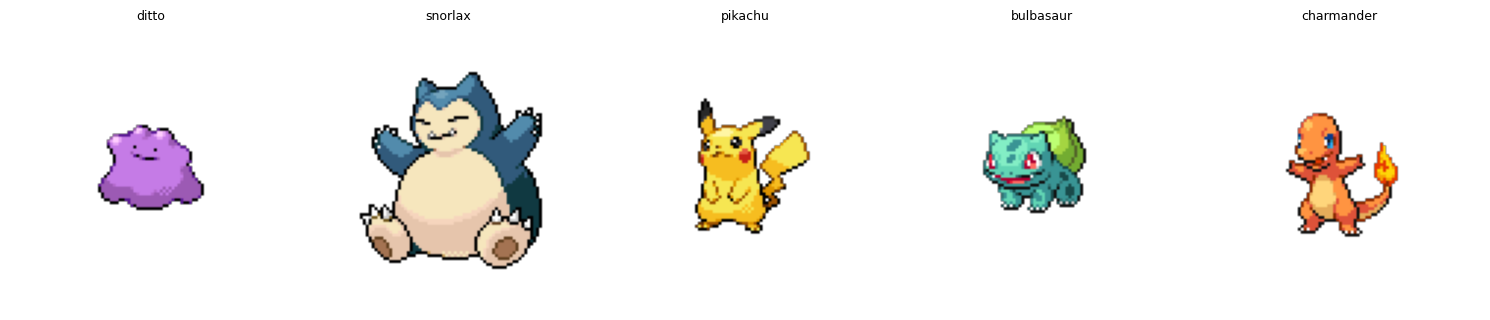

In [ ]:
sprite_urls = df_final["sprite_url"].tolist()
labels = df_final["name"].tolist()

n = len(sprite_urls)
cols = 5
rows_needed = math.ceil(n / cols)
fig, axes = plt.subplots(rows_needed, cols, figsize=(15, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.axis("off")
    if i >= n or sprite_urls[i] is None:
        continue
    try:
        resp = requests.get(sprite_urls[i], headers=api_header, timeout=20)
        img = Image.open(BytesIO(resp.content)).convert("RGBA")
        ax.imshow(img)
        ax.set_title(labels[i], fontsize=9)
    except Exception:
        ax.text(0.5, 0.5, "error", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()

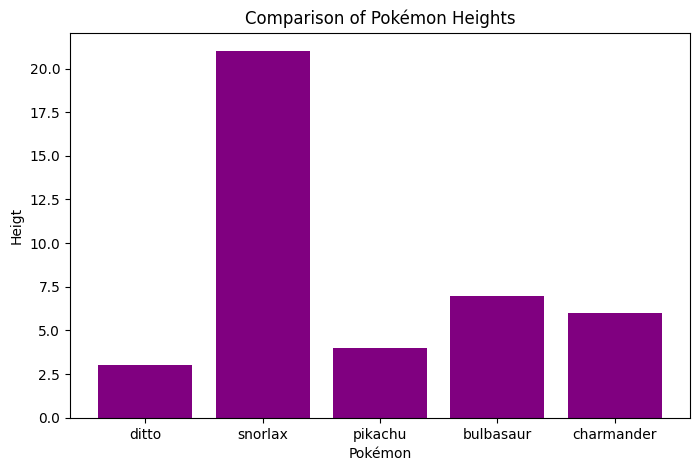

In [ ]:
plt.figure(figsize =(8,5))
plt.bar(df_details["name"], df_details["height"], color = "purple")
plt.xlabel("Pokémon")
plt.ylabel("Heigt")
plt.title("Comparison of Pokémon Heights")
plt.show()

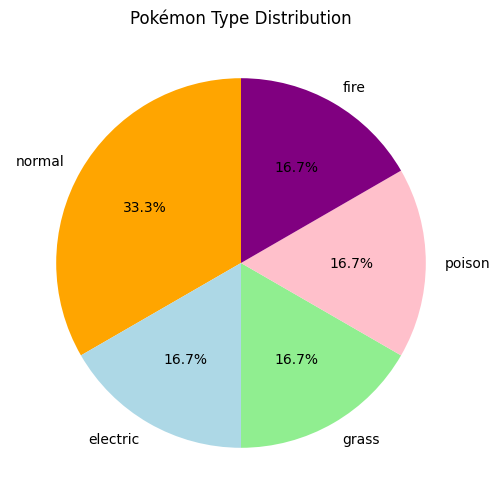

In [ ]:
all_types = df_details["types"].str.split(",").explode()

plt.figure(figsize = (6,6))
all_types.value_counts().plot.pie(
    autopct = "%1.1f%%",
    startangle=90,
    colors = ["orange", "lightblue", "lightgreen", "pink", "purple"]
)

plt.title("Pokémon Type Distribution")
plt.ylabel("")
plt.show()

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.

Tarana Ahad